In [1]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch 

Welcome to JupyROOT 6.28/13


[234 158 231 116 234]


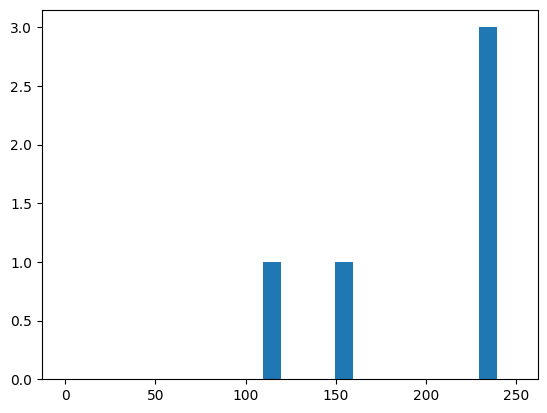

Error in <TInterpreter::TCling::AutoLoad>: failure loading library libRATDict.so for vector<vector<int> >


In [8]:
df = ROOT.RDataFrame("output", "eos_muons.root")
nhits = df.AsNumpy(columns=["nhits"])["nhits"]
print(nhits)
plt.hist(nhits, bins=np.arange(-0.5,255.5,10))
plt.show()

trackingPosX = df.AsNumpy(columns=["trackPosX"])["trackPosX"]
trackingPosY = df.AsNumpy(columns=["trackPosY"])["trackPosY"]
trackingPosZ = df.AsNumpy(columns=["trackPosZ"])["trackPosZ"]
trackingParticle = df.AsNumpy(columns=["trackPDG"])["trackPDG"]
mcke = df.AsNumpy(columns=["mcke"])["mcke"]
mcpdg = df.AsNumpy(columns=["mcpdg"])["mcpdg"]

[500. 500. 500. 500. 500.]


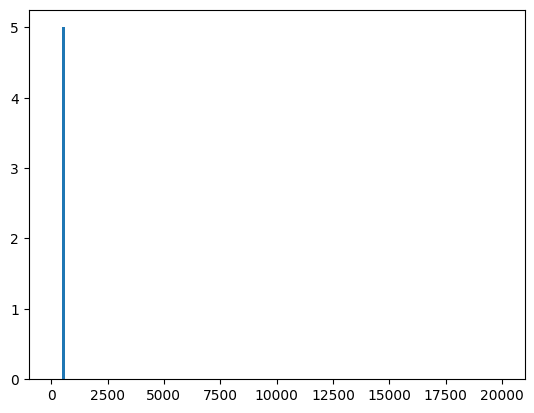

In [11]:
print(mcke)
plt.hist(mcke, bins=np.arange(-0.5,20000,100))
plt.show()

# Plot a single event (Can eat up a lot of cpu usage :D)

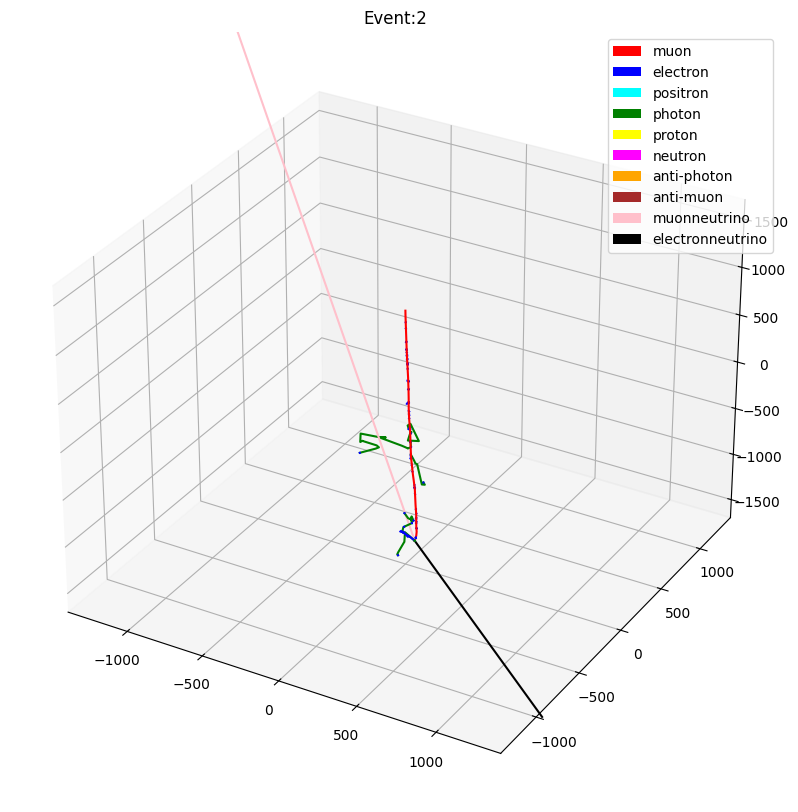

In [31]:
# Plots the tracks of the particles from the simulation

#df = ROOT.RDataFrame("output", "eos_ambe_1k_water.root")

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.set_xlim([-1400,1400])
ax.set_ylim([-1400,1400])
ax.set_zlim([-1700,1700])

event = 2

#print(trackingPosX[0])
#print(tackingParticle[event])

particles = {
    -22:"anti-photon",
    11:"electron",
    -11:"positron",
    22:"photon",
    13:"muon",
    -13:"anti-muon",
    2212:"proton",
    2112:"neutron",
    14:"muonneutrino",
    -12:"electronneutrino"
}

colorPalette = {
    "muon": "red",
    "electron": "blue",
    "positron": "cyan",
    "photon": "green",
    "proton": "yellow",
    "neutron": "magenta",
    "anti-photon": "orange",
    "anti-muon": "brown",
    "muonneutrino":"pink",
    "electronneutrino": "black"
}

particlBlacklist = ["anti-photon"] #Should have a particle blacklist not whitelist, that way I don't have to input every particle in existence

# Setting up lengend
# legendElements = []
# for particle in DisplayParticles:
#     legendElements.append(Patch(facecolor=colorPalette[particle], label=particle))
legendElements = []
for index, particle in enumerate(colorPalette):
    #print(index, particle)
    legendElements.append(Patch(facecolor=colorPalette[particle], label=particle))

plt.legend(handles=legendElements)
plt.title("Event:"+str(event))

for vector in zip(trackingPosX[event], trackingPosY[event], trackingPosZ[event], trackingParticle[event]):
    try:
        if particles[vector[3]] in particlBlacklist:
            continue
    except KeyError:
        print("particle:" + str(vector[3]))
        continue
        
    x = []
    y = []
    z = []
    for xcomponent in vector[0]:
        x.append(xcomponent)
    for ycomponent in vector[1]:
        y.append(ycomponent)
    for zcomponent in vector[2]:
        z.append(zcomponent)

    ax.plot3D(x, y, z, colorPalette[particles[vector[3]]])

    #ax.plot(x,y)